In [19]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
data = pd.read_csv(r"C:\Users\dell\OneDrive\Bureau\projets\mail_data.csv" , encoding='latin-1')
print(data.columns)
print(data.head())

Index(['Category', 'Message'], dtype='object')
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
def clean_text(text):
    text = text.lower()  # minuscules
    text = re.sub(r'\W', ' ', text)  # supprimer caractères spéciaux
    text = re.sub(r'\d+', '', text)  # supprimer chiffres
    text = re.sub(r'\s+', ' ', text).strip()  # espaces multiples -> espace unique
    return text

# Appliquer nettoyage
data['cleaned'] = data['Message'].apply(clean_text)
print(data.head())

  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                             cleaned  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in a wkly comp to win fa cup final ...  
3        u dun say so early hor u c already then say  
4  nah i don t think he goes to usf he lives arou...  


In [6]:
# Suppression des stop words et lemmatisation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

data['processed'] = data['cleaned'].apply(preprocess_text)
print(data.head())

  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                             cleaned  \
0  go until jurong point crazy available only in ...   
1                            ok lar joking wif u oni   
2  free entry in a wkly comp to win fa cup final ...   
3        u dun say so early hor u c already then say   
4  nah i don t think he goes to usf he lives arou...   

                                           processed  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['processed'], data['Category'], test_size=0.2, random_state=42)

In [ ]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

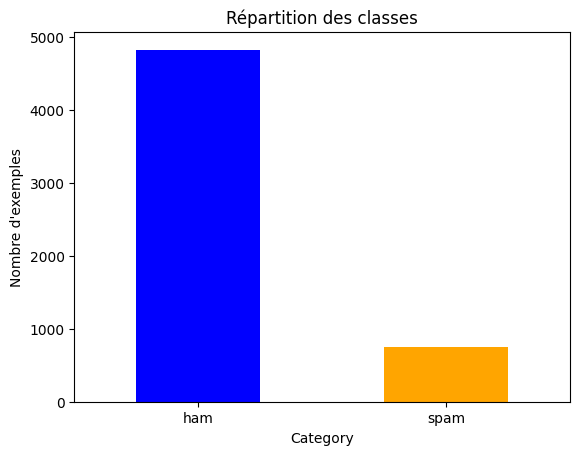

In [9]:
data['Category'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Répartition des classes')
plt.xlabel('Category')
plt.ylabel('Nombre d\'exemples')
plt.xticks(rotation=0)
plt.show()

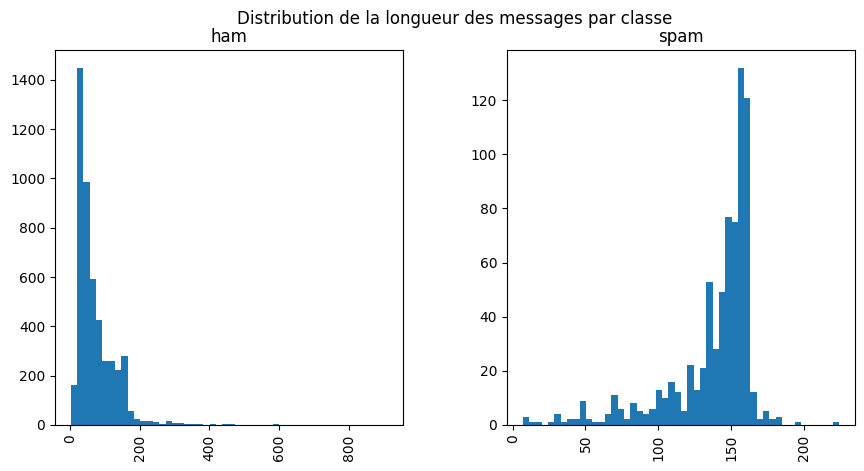

In [10]:
data['message_length'] = data['Message'].apply(len)

# Histogramme des longueurs
data.hist(column='message_length', by='Category', bins=50, figsize=(10,5))
plt.suptitle('Distribution de la longueur des messages par classe')
plt.show()


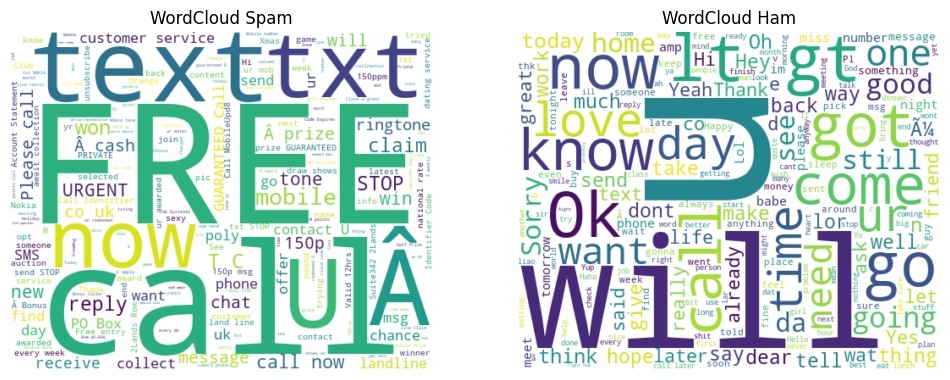

In [18]:
spam_text = " ".join(data[data['Category'] == 'spam']['Message'])
ham_text = " ".join(data[data['Category'] == 'ham']['Message'])

plt.figure(figsize=(12,6))

# WordCloud pour le spam
plt.subplot(1, 2, 1)
wc_spam = WordCloud(width=500, height=400, background_color='white').generate(spam_text)
plt.imshow(wc_spam, interpolation='bilinear')
plt.title('WordCloud Spam')
plt.axis('off')

# WordCloud pour le ham
plt.subplot(1, 2, 2)
wc_ham = WordCloud(width=500, height=400, background_color='white').generate(ham_text)
plt.imshow(wc_ham, interpolation='bilinear')
plt.title('WordCloud Ham')
plt.axis('off')

plt.show()


In [20]:
# Création du modèle
model = MultinomialNB()

# Entraînement sur les données vectorisées
model.fit(X_train_vec, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test_vec)

# Évaluation des performances
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9776
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[963   3]
 [ 22 127]]


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Création du modèle SVM avec un noyau linéaire (adapté aux données textuelles)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Entraînement du modèle
svm_model.fit(X_train_vec, y_train)

# Prédiction sur l'ensemble test
y_pred_svm = svm_model.predict(X_test_vec)

# Évaluation des performances
print(f"Accuracy SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report SVM:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy SVM: 0.9865
Classification Report SVM:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix SVM:
[[965   1]
 [ 14 135]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Création du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement
rf_model.fit(X_train_vec, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test_vec)

# Évaluation
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy Random Forest: 0.9812
Classification Report Random Forest:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix Random Forest:
[[966   0]
 [ 21 128]]


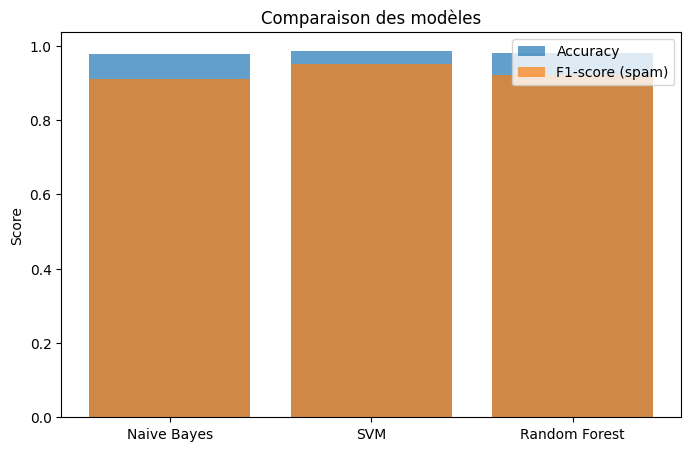

In [24]:
models = ['Naive Bayes', 'SVM', 'Random Forest']
accuracy = [0.9776, 0.9865, 0.9812]
f1_spam = [0.91, 0.95, 0.92]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, alpha=0.7, label='Accuracy')
plt.bar(models, f1_spam, alpha=0.7, label='F1-score (spam)')
plt.ylabel('Score')
plt.title('Comparaison des modèles')
plt.legend()
plt.show()


In [30]:
import joblib

joblib.dump((svm_model, vectorizer), 'svm_model_with_vectorizer.pkl')

model, tfidf = joblib.load('svm_model_with_vectorizer.pkl')

# Exemple de messages à tester
messages = [
    "Win a free iPhone now!!! Click here to claim your prize!",
    "Hey, are we still meeting for coffee tomorrow?",
    "Congratulations, you have won a $1000 Walmart gift card!",
    "Please review the attached report before the meeting."
]
def preprocess_new_message(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)


messages_processed = [preprocess_new_message(msg) for msg in messages]


messages_vec = tfidf.transform(messages_processed)


predictions = model.predict(messages_vec)

for msg, pred in zip(messages, predictions):
    print(f"\n Message : {msg}\n Prédiction : {pred}")




 Message : Win a free iPhone now!!! Click here to claim your prize!
 Prédiction : spam

 Message : Hey, are we still meeting for coffee tomorrow?
 Prédiction : ham

 Message : Congratulations, you have won a $1000 Walmart gift card!
 Prédiction : ham

 Message : Please review the attached report before the meeting.
 Prédiction : ham
